<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/StatisticalRethinkingSolutions2_Ch15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Checking versions of g++ and make
system("g++ --version", intern = TRUE)
system("make --version", intern = TRUE)

# Install g++ and make if needed
system("sudo apt install g++", intern = TRUE)
system("sudo apt install make", intern = TRUE)


[1] "g++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0"                                  
[2] "Copyright (C) 2021 Free Software Foundation, Inc."                          
[3] "This is free software; see the source for copying conditions.  There is NO" 
[4] "warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE."
[5] ""

[1] "GNU Make 4.3"                                                                 
[2] "Built for x86_64-pc-linux-gnu"                                                
[3] "Copyright (C) 1988-2020 Free Software Foundation, Inc."                       
[4] "License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>"
[5] "This is free software: you are free to change and redistribute it."           
[6] "There is NO WARRANTY, to the extent permitted by law."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "g++ is already the newest version (4:11.2.0-1ubuntu1)."         
[5] "g++ set to manually installed."                                 
[6] "0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "make is already the newest version (4.3-4.1build1)."            
[5] "make set to manually installed."                                
[6] "0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded."

In [2]:
# Install cmdstanr from GitHub
if (!require(cmdstanr)) {
  devtools::install_github("stan-dev/cmdstanr")
}

# Set up CmdStan if it's not already set up
library(cmdstanr)
if (!cmdstanr::cmdstan_version()) {
  cmdstanr::install_cmdstan()
}

# Verify installation
cmdstanr::check_cmdstan_toolchain()


Loading required package: cmdstanr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cmdstanr’”



numDeriv     (NA -> 2016.8-1.1) [CRAN]
matrixStats  (NA -> 1.5.0     ) [CRAN]
distribut... (NA -> 0.5.0     ) [CRAN]
tensorA      (NA -> 0.36.2.1  ) [CRAN]
checkmate    (NA -> 2.3.2     ) [CRAN]
abind        (NA -> 1.4-8     ) [CRAN]
posterior    (NA -> 1.6.1     ) [CRAN]


Installing 7 packages: numDeriv, matrixStats, distributional, tensorA, checkmate, abind, posterior

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpY6Dxsa/remotes16f5bf7a03f/stan-dev-cmdstanr-12211d4/DESCRIPTION’ ... OK
* preparing ‘cmdstanr’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘cmdstanr_0.8.1.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

This is cmdstanr version 0.8.1.9000

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan



ERROR: Error: CmdStan path has not been set yet. See ?set_cmdstan_path.


IF YOU ENCOUNTER AN ERROR, JUST KEEP RUNNING CODE BELOW.

In [3]:
# Install CmdStan using cmdstanr
library(cmdstanr)
cmdstanr::install_cmdstan()

# After installation, set the CmdStan path
cmdstan_path <- cmdstanr::cmdstan_path()
cmdstanr::set_cmdstan_path(cmdstan_path)

# Verify the installation
cmdstanr::cmdstan_version()


The C++ toolchain required for CmdStan is setup properly!

* Latest CmdStan release is v2.36.0

* Installing CmdStan v2.36.0 in /root/.cmdstan/cmdstan-2.36.0

* Downloading cmdstan-2.36.0.tar.gz from GitHub...

* Download complete

* Unpacking archive...

* Building CmdStan binaries...



g++ -Wno-deprecated-declarations -std=c++17 -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes -Wno-class-memaccess      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.84.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -MT bin/cmdstan/stansummary.o -MM -E -MG -MP -MF src/cmdstan/stansummary.d src/cmdstan/stansummary.cpp
cp bin/linux-stanc bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.c -o stan/lib/stan_math/lib/sund

* Finished installing CmdStan to /root/.cmdstan/cmdstan-2.36.0


CmdStan path set to: /root/.cmdstan/cmdstan-2.36.0

CmdStan path set to: /root/.cmdstan/cmdstan-2.36.0



[1] "2.36.0"

In [4]:
# Install necessary packages
install.packages(c("coda", "mvtnorm", "devtools", "loo", "dagitty", "shape"))

# Load devtools for GitHub installation
library(devtools)

# Install rethinking from GitHub
devtools::install_github("rmcelreath/rethinking")


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘V8’


Loading required package: usethis





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpY6Dxsa/remotes16f5b32d351/rmcelreath-rethinking-ac1b3b2/DESCRIPTION’ ... OK
* preparing ‘rethinking’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘rethinking_2.42.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(rethinking)

Loading required package: posterior

This is posterior version 1.6.1


Attaching package: ‘posterior’


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match


Loading required package: parallel

rethinking (Version 2.42)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




In [6]:
# Test Installation

## Simulate some data for a binary outcome based on a single predictor
n <- 100
x <- rnorm(n)
prob <- 1 / (1 + exp(-x))
y <- rbinom(n, 1, prob)

## Fit a logistic regression using ulam
fit <- ulam(
  alist(
    y ~ bernoulli( p ),
    logit(p) <- a + b*x,
    a ~ normal(0, 1),
    b ~ normal(0, 1)
  ), data = list(x = x, y = y)
)

precis(fit)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.0 seconds.


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0.3219755,0.2272400,-0.02408542,0.6748725,0.9982982,290.9985
b,0.9763428,0.2759232,0.57036924,1.4223205,1.0042190,357.4027


# Chapter 15

## Easy

### 15E1

Rewrite the Oceanic tools model (from Chapter 11) below so that it assumes measured error on the log population sizes of each society. You don’t need to fit the model to data. Just modify the  mathematical formula below.  

$$T_i ∼ Poisson(\mu_i)$$
$$\text{log} \ \mu_i = \alpha + \beta \ \text{log} P_i$$
$$α ∼ Normal(0, 1.5)$$
$$β ∼ Normal(0, 1)$$


#### Answer

To add measurement error, we need to give a probability distribution to the errant variable (here, $\text{log} P_i$) such that we can interpret each observation of that variable as containing both signal and noise.

$$T_i ∼ Poisson(\mu_i)$$
$$\text{log} \ \mu_i = \alpha + \beta \ \text{log} P_{i}^{true}$$
$$α ∼ Normal(0, 1.5)$$
$$β ∼ Normal(0, 1)$$
$$\text{log} P_i \sim Normal(P_{i}^{true}, \sigma_P)$$
$$\sigma_P \sim exponential(1)$$

### 15E2

Rewrite the same model so that it allows imputation of missing values for log population.  There aren’t any missing values in the variable, but you can still write down a model formula that  would imply imputation, if any values were missing.


#### Answer

Now we do basically the same thing that we did in 15E1 for measurement error, except we apply the concept one level deeper.

$$T_i ∼ Poisson(\mu_i)$$
$$\text{log} \ \mu_i = \alpha + \beta \ \text{log} P_{i}^{}$$
$$α ∼ Normal(0, 1.5)$$
$$β ∼ Normal(0, 1)$$
$$\text{log} P_i \sim Normal(\bar{P}, \sigma_P)$$
$$\bar{P} \sim Normal(0,1)$$
$$\sigma_P \sim exponential(1)$$

Notice the difference between 15E1 and 15E2.
* In 15E1, we assumed our observations were tainted by noise.  Hence, we used a distribution of $\text{log} P_i$ to create our linear model.
* In 15E2, we assumed our observations were accurate, but that some were missing.  Hence, we created our linear model wi the observed values of $\text{log} P_i$.  But since some of these were missing, we again assigned a distribution to $\text{log} P_i$, but this time such that it would only apply to missing values.

## Medium

### 15M1

Using the mathematical form of the imputation model in the chapter, explain what is being assumed about how the missing values were generated.

#### Answer

I'm not sure which model we're meant to refer to, but I don't it think it matters that much for this question.  So let's use the model we made in Question 15E2:

$$T_i ∼ Poisson(\mu_i)$$
$$\text{log} \ \mu_i = \alpha + \beta \ \color{blue}{\text{log} P_{i}^{}}$$
$$α ∼ Normal(0, 1.5)$$
$$β ∼ Normal(0, 1)$$
$$\color{blue}{\text{log} P_i \sim Normal(\bar{P}, \sigma_P)}$$
$$\color{blue}{\bar{P}^{} \sim Normal(0,1)}$$
$$\color{blue}{\sigma_P \sim exponential(1)}$$

The next thing I'm not sure about is the wording of the question--"...what is being assumed about how the missing values were generated".  The way the math generates them is spelled out in the model: missing values of $\text{log}P_i$ are generated randomly from a normal distribution with mean $\bar{P}$ and standard deviation $\sigma_P$.  If this captures something about the way the real-world values, which went missing, were generated, then it implies the assumption that those values were generated by the same process as the observed values and that their missingness was completely random--MCAR.

### 15M2

Reconsider the primate milk missing data example from the chapter. This time, assign $B$ a  distribution that is properly bounded between zero and 1. A beta distribution, for example, is a good  choice.

#### Answer

Let's jump right in with the modified model.

In [ ]:
data(milk)
d <- milk
d$neocortex.prop <- d$neocortex.perc/100
d$logmass <- log(d$mass)
dat_list <- list(K = standardize(d$kcal.per.g),
                 B = d$neocortex.prop, # No longer normalized, since we're constraining w/beta distribution
                 M = standardize(d$logmass))
m15.5b <- ulam(
  alist(
    K ~ dnorm(mu, sigma),
      mu <- a + bB*B + bM*M,
        a ~ dnorm(0, 0.5),
        bB ~ dnorm(0, 0.5),
        B ~ dbeta2(nu, tau),
          nu ~ dbeta(2, 2),
          tau ~ dexp(1),
        bM ~ dnorm(0, 0.5),
      sigma ~ dexp( 1 )
), data=dat_list,
   chains=4,
   cores=4,
   iter=1000)

Found 12 NA values in B and attempting imputation.



Running MCMC with 4 parallel chains, with 1 thread(s) per chain...



Chain 1 Rejecting initial value:

Chain 1   Error evaluating the log probability at the initial value.

Chain 1 Exception: beta_lpdf: Random variable[2] is -1.02276, but must be in the interval [0, 1] (in '/tmp/RtmpqHFRf2/model-9f4975faa5.stan', line 37, column 4 to column 42)

Chain 1 Exception: beta_lpdf: Random variable[2] is -1.02276, but must be in the interval [0, 1] (in '/tmp/RtmpqHFRf2/model-9f4975faa5.stan', line 37, column 4 to column 42)

Chain 1 Rejecting initial value:

Chain 1   Error evaluating the log probability at the initial value.

Chain 1 Exception: beta_lpdf: Random variable[4] is -0.712675, but must be in the interval [0, 1] (in '/tmp/RtmpqHFRf2/model-9f4975faa5.stan', line 37, column 4 to column 42)

Chain 1 Exception: beta_lpdf: Random variable[4] is -0.712675, but must be in the interval [0, 1] (in '/tmp/RtmpqHFRf2/model-9f4975faa5.stan', line 37, column 4 to column 42)

Chain 1 Rejecting initial value:

Chain 1   Error evaluating the log probability at the in

Hm, that didn't work.  There's one or two issues.  First, the warnings suggest that my imputed values are not abiding by the boundaries of the beta distribution.  For this, I'll set a prior on the imputed values.  Second, I think there could be a problem due to the fact that we're no longer using a standardized version of $B$.  So maybe we need to adjust the prior for its coefficient `bB`.

In [ ]:
m15.5c <- ulam(
  alist(
    K ~ dnorm(mu, sigma),
      mu <- a + bB*B + bM*M,
        a ~ dnorm(0, 0.5),
        bB ~ dnorm(0, 3),
        B ~ dbeta2(nu, tau),
          nu ~ dbeta(2, 2),
          tau ~ dexp(1),
          vector[12]:B_impute ~ uniform(0,1),
        bM ~ dnorm(0, 0.5),
      sigma ~ dexp( 1 )
), data=dat_list,
   chains=4,
   cores=4,
   iter=1000)

Found 12 NA values in B and attempting imputation.



Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: beta_lpdf: Second shape parameter is 0, but must be positive finite! (in '/tmp/RtmpqHFRf2/model-9f2ecbf6a5.stan', line 38, column 4 to column 42)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: beta_lpdf: Second shape parameter is 0, but must be positive finite! (in '/tmp/RtmpqHFRf2/model-9f2ecbf6a5.stan', line 38, column 4 to column 42)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: beta_lpdf: First shape parameter is inf, but must be positive finite! (in '/tmp/RtmpqHFRf2/model-9f2ecbf6a5.stan', line 38, column 4 to column 42)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 5

In [ ]:
precis(m15.5c, depth=2)

,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.1663713,0.47772002,-0.9121279,0.58915282,1.0036138,1157.245
bB,0.2800596,0.76303821,-0.9261201,1.49820380,1.0014097,1173.933
nu,0.6507154,0.03909982,0.5853071,0.70896253,1.0018106,1544.129
tau,8.3698872,2.66194107,4.5250068,12.92875300,1.0023682,753.934
bM,-0.2956742,0.16866500,-0.5632760,-0.03991805,1.0015932,2319.045
sigma,0.9779725,0.13770218,0.7816022,1.20436210,1.0021883,2144.276
B_impute[1],0.6407210,0.16926288,0.3527206,0.88669571,1.0006170,2396.170
B_impute[2],0.6407774,0.16839697,0.3489696,0.89153785,1.0009875,2375.803
B_impute[3],0.6375080,0.16867474,0.3423283,0.88266287,1.0017051,2160.040


Bingo.

### 15M3

Repeat the divorce data measurement error models, but this time double the standard errors.  Can you explain how doubling the standard errors impacts inference?

#### Answer

Let's copy-paste, then modify the model from the chapter.

In [ ]:
data(WaffleDivorce)
d <- WaffleDivorce
dlist <- list(D_obs = standardize(d$Divorce),
              D_sd = (d$Divorce.SE / sd(d$Divorce))*2, # double SE
              M = standardize(d$Marriage),
              A = standardize(d$MedianAgeMarriage),
              N = nrow(d))

m15.1 <- ulam(
  alist(
    D_obs ~ dnorm(D_true, D_sd),
      vector[N]:D_true ~ dnorm(mu, sigma),
        mu <- a + bA*A + bM*M,
          a ~ dnorm(0, 0.2),
          bA ~ dnorm(0, 0.5),
          bM ~ dnorm(0, 0.5),
          sigma ~ dexp(1)
  ), data=dlist,
     chains=4,
     cores=4,
     iter=1000)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iter

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.




We're getting some warnings about E-BFMI.  Roughly speaking, this means that our chains are having difficulting exploring the additional uncertainty in the posterior.  Let's try to fix this with a non-central parameterization.

In [ ]:
m15.1nc <- ulam(
  alist(
    D_obs ~ dnorm(mu + z_true*sigma, D_sd),
      vector[N]:z_true ~ dnorm(0, 1),
        mu <- a + bA*A + bM*M,
          a ~ dnorm(0, 0.2),
          bA ~ dnorm(0, 0.5),
          bM ~ dnorm(0, 0.5),
          sigma ~ dexp(1)
  ), data=dlist,
     chains=4,
     cores=4,
     iter=1000)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iter

In [ ]:
round(precis(m15.1nc),2)

50 vector or matrix parameters hidden. Use depth=2 to show them.



,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.11,0.10,-0.28,0.05,1,2498.82
bA,-0.65,0.17,-0.91,-0.38,1,2434.08
bM,0.20,0.19,-0.11,0.51,1,2294.92
sigma,0.15,0.11,0.01,0.36,1,1116.14


That fixed it.  What do we see has happened compared to the chapter.

In the chapter, when the SE was normal, we got a precis output

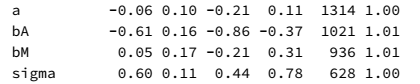

Neither `a` nor `bA` have really changed, but `bM` and `sigma` have.  Both the estimate and credibility interval have increased for `bM` while the estimate for `sigma` has decreased. Apparently, the less-precise estimates for each state has shifted how much influence each state exerts on the model.

### 15M4

Simulate data from this DAG: $X → Y → Z$. Now fit a model that predicts $Y$ using both $X$ and $Z$. What kind of confound arises, in terms of inferring the causal influence of $X$ on $Y$?

#### Answer
We can do this outside of the Bayesian framework.  Let's simulate some data.

In [ ]:
N <- 100
X <- rnorm(N)
  a <- 1.5
Y <- a*X + rnorm(N)
  b <- 2.25
Z <- b*Y + rnorm(N)

Now let's run the regression.

In [ ]:
m <- lm(Y ~ X+Z)
summary(m)


Call:
lm(formula = Y ~ X + Z)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.89316 -0.30785  0.00368  0.28177  1.01401 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.03304    0.04110  -0.804  0.42338    
X            0.26215    0.07023   3.733  0.00032 ***
Z            0.35894    0.01669  21.508  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4059 on 97 degrees of freedom
Multiple R-squared:  0.9447,	Adjusted R-squared:  0.9436 
F-statistic: 828.5 on 2 and 97 DF,  p-value: < 2.2e-16


If this regression were causally valid, then we should get that the coefficient for `X` would equal `a`.  But it doesn't.  We should've predicted this would be the case since we knew that our regression did not reflect the causal genesis of the data.

But more specifically in this case, we're conditioning on $Z$, which is a *descendant* of $Y$.  What happens when we condition on a descendant?  It's like conditioning on the parent...which, here, is $Y$.  So we're kinda conditioning on the outcome variable.  If this were done in the course of an experiment, rather than statistically after the data was generated, we'd call this "selection bias".

### 15M5

Return to the singing bird model, `m15.9`, and compare the posterior estimates of cat presence  (`PrC1`) to the true simulated values. How good is the model at inferring the missing data? Can you think of a way to change the simulation so that the precision of the inference is stronger?

#### Answer
Let's copy and paste from the chapter.

In [7]:
set.seed(9)
N_houses <- 100L
alpha <- 5
beta <- (-3)
k <- 0.5
r <- 0.2
cat <- rbern( N_houses, k)
notes <- rpois( N_houses, alpha + beta*cat)
R_C <- rbern( N_houses, r)
cat_obs <- cat
cat_obs[R_C==1] <- (-9L)
dat <- list(
  notes = notes,
  cat = cat_obs,
  RC = R_C,
  N = as.integer(N_houses))

In [8]:
m15.9 <- ulam(
  alist(
    #singing bird model
    notes|RC==0 ~ poisson( lambda),
    notes|RC==1 ~ custom( log_sum_exp(
      log(k) + poisson_lpmf( notes | exp(a + b)),
      log(1-k) + poisson_lpmf( notes | exp(a))
    )),
    log(lambda) <- a + b*cat,
    a ~ normal(0,1),
    b ~ normal(0,0.5),

    #sneaking cat model
    cat|RC==0 ~ bernoulli(k),
    k ~ beta(2,2),

    #imputed values
    gq> vector[N]:PrC1 <- exp(lpC1)/(exp(lpC1)+exp(lpC0)),
    gq> vector[N]:lpC1 <- log(k) + poisson_lpmf( notes[i] | exp(a+b)),
    gq> vector[N]:lpC0 <- log(1-k) + poisson_lpmf( notes[i] | exp(a))
    ), data=dat, chains=4, cores=4)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration:

Now we need to compare the model's predictions for `PrC1` to the raw data.

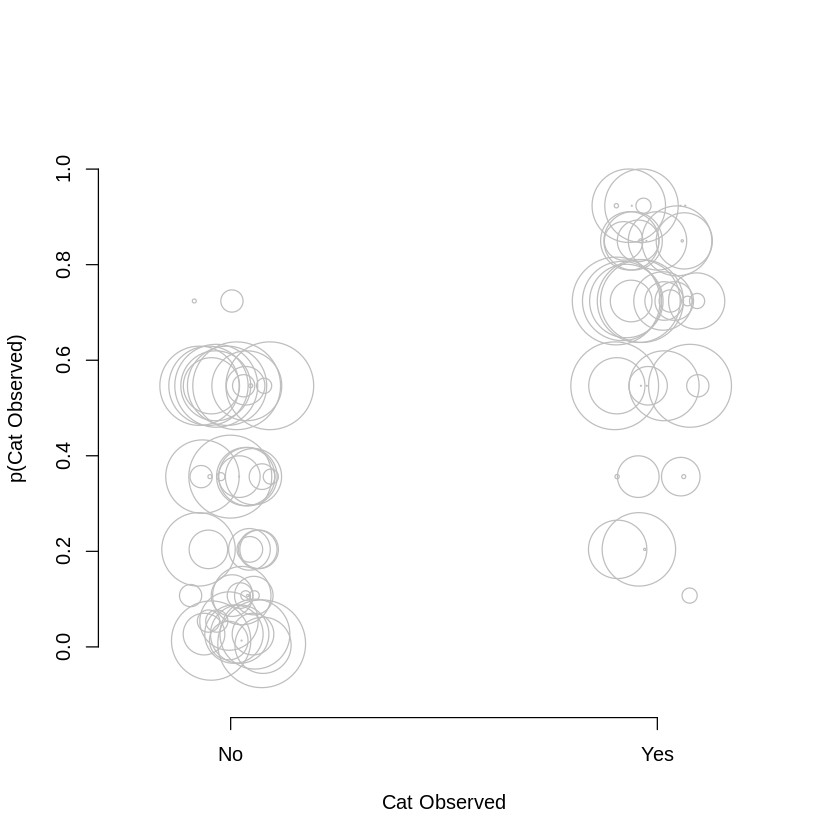

In [47]:
post <- extract.samples(m15.9)
post_PrC1 <- post$PrC1
PrC1_means <- colMeans(post_PrC1)
PrC1_CrIs <- apply(post_PrC1, 2, HPDI)

plot(PrC1_means ~ jitter(cat, 0.5),
     col="grey", cex=PrC1_CrIs*10,
     xlab="Cat Observed", ylab="p(Cat Observed)",
     xlim=c(-0.25, 1.25), ylim=c(-0.1, 1.1),
     bty="n", xaxt="n"); axis(1, at = c(0, 1), labels = c("No", "Yes"))

Is this a good fit?

One way we could assess this is to take the `unique(PrC1_means)` values and see how close they are to the observed `cat` values.

In [196]:
# notice there are more observations than unique mean values
length(PrC1_means)
length(unique(PrC1_means))

[1] 100

[1] 12

[1] 0.1474598

[1] 30.36792

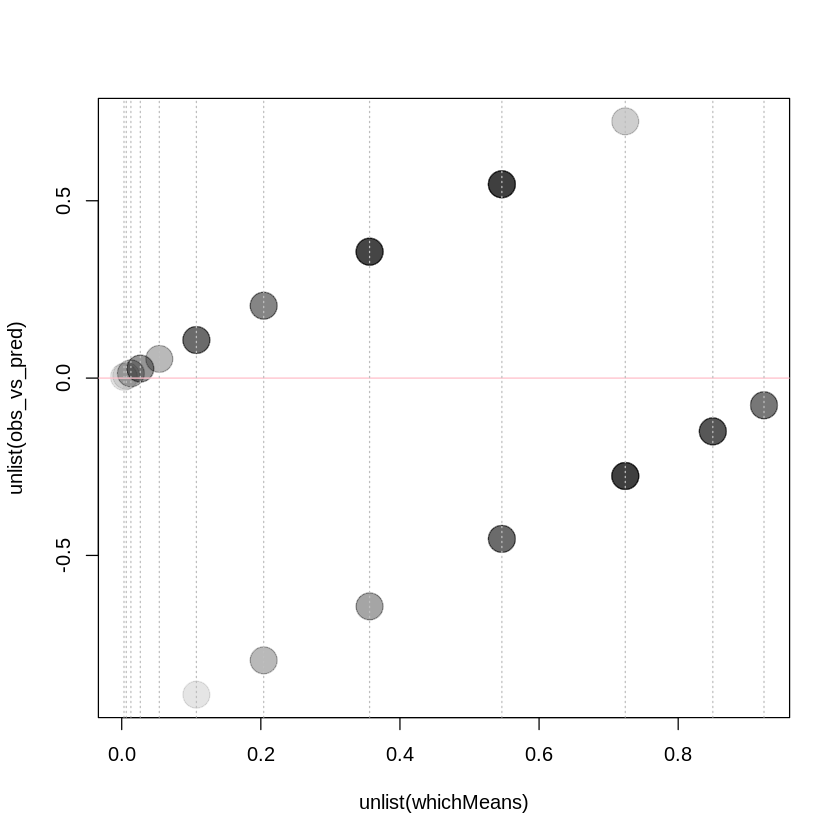

In [199]:
whichMeans <- list()
obs_vs_pred <- list()
for(m in 1:length(unique(PrC1_means))){
  active_mean <- unique(PrC1_means)[m]
  matching_means <- which(PrC1_means==active_mean)
  correspondObs <- cat[matching_means]
  whichMeans[[m]] <- PrC1_means[PrC1_means==active_mean]
  obs_vs_pred[[m]] <- active_mean - correspondObs
}


plot(unlist(obs_vs_pred) ~ unlist(whichMeans),
     cex=3, pch=19, col=adjustcolor("black", 0.1))
abline(h=0, col="pink")
for(u in 1:length(unique(PrC1_means))){
  abline(v=unique(PrC1_means)[u], col="grey", lty=3)
}

sum(unlist(obs_vs_pred))
sum(abs(unlist(obs_vs_pred)))

In [ ]:
black